In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('test.csv')
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


### Selección de Variables

In [3]:
data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [4]:
# Variable categórica a predecir: Satisfaction
# Convertir variable
data['satisfaction'] = data['satisfaction'].astype('category')
print(f"Satisfaction: {data['satisfaction'].dtype}")

# Convertir variables predictoras 
columnas_categorias = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for col in columnas_categorias:
    data[col] = data[col].astype('category')
    print(f'{col}: {data[col].dtype}')

# Variables predictoras númericas: Age, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and Drink, Online boarding, 
# Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes
# Variables predictoras categoricas: Gender, Customer Type, Type of Travel, Class

Satisfaction: category
Gender: category
Customer Type: category
Type of Travel: category
Class: category


In [5]:
data.dtypes

Unnamed: 0                              int64
id                                      int64
Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Inflight service                        int64
Cleanliness                       

### Imputación

In [6]:
# Variables con Nulls
columnas_con_na = []

for col in data.columns:
    porcentaje_na = data[col].isnull().mean()
    if(porcentaje_na > 0):
        columnas_con_na.append(col)

columnas_con_na

['Arrival Delay in Minutes']

In [7]:
# Porcentaje de Nulls
data[columnas_con_na].isnull().mean()

Arrival Delay in Minutes    0.003195
dtype: float64

In [8]:
Arrival_Delay_in_Minutes_Mediana = data['Arrival Delay in Minutes'].median()
Arrival_Delay_in_Minutes_Media = data['Arrival Delay in Minutes'].mean()
print(f'Mediana: {Arrival_Delay_in_Minutes_Mediana}')
print(f'Media: {Arrival_Delay_in_Minutes_Media}')

Mediana: 0.0
Media: 14.74085660217047


In [9]:
data['Arrival Delay in Minutes Media'] = np.round(data['Arrival Delay in Minutes'].fillna(Arrival_Delay_in_Minutes_Media), 0)
data['Arrival Delay in Minutes Mediana'] = np.round(data['Arrival Delay in Minutes'].fillna(Arrival_Delay_in_Minutes_Media), 0)

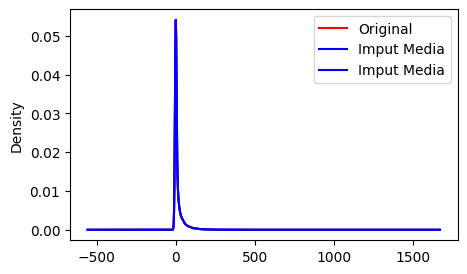

In [10]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)

data['Arrival Delay in Minutes'].plot.density(color='red', label='Original')
data['Arrival Delay in Minutes Media'].plot.density(color='blue', label='Imput Media')
data['Arrival Delay in Minutes Mediana'].plot.density(color='blue', label='Imput Media')
ax.legend()
plt.show()

In [11]:
print("Varianza Original", data['Arrival Delay in Minutes'].var())
print("Varianza Media", data['Arrival Delay in Minutes Media'].var())
print("Varianza Media", data['Arrival Delay in Minutes Mediana'].var())

Varianza Original 1407.5657016762152
Varianza Media 1403.068208041598
Varianza Media 1403.068208041598


In [12]:
print(data['Gender'].value_counts(normalize=True))
print()

print(data['Customer Type'].value_counts(normalize=True))
print()

print(data['Type of Travel'].value_counts(normalize=True))
print()

print(data['Class'].value_counts(normalize=True))

Gender
Female    0.507083
Male      0.492917
Name: proportion, dtype: float64

Customer Type
Loyal Customer       0.815253
disloyal Customer    0.184747
Name: proportion, dtype: float64

Type of Travel
Business travel    0.69441
Personal Travel    0.30559
Name: proportion, dtype: float64

Class
Business    0.481021
Eco         0.445180
Eco Plus    0.073799
Name: proportion, dtype: float64


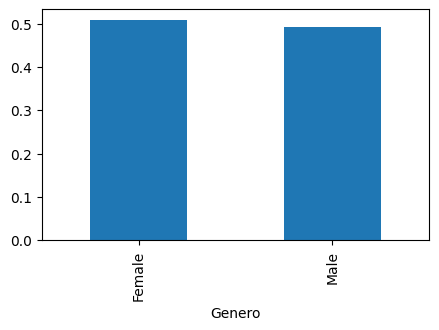

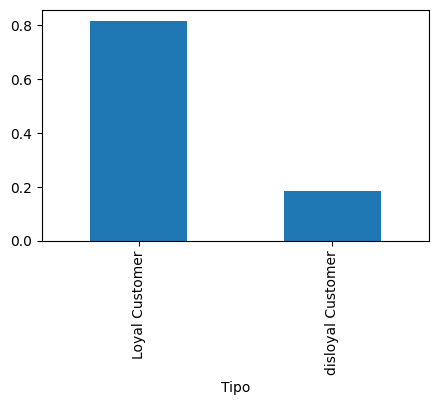

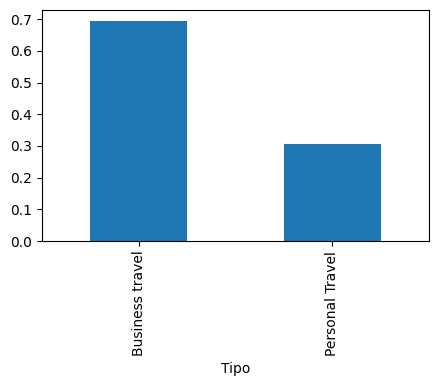

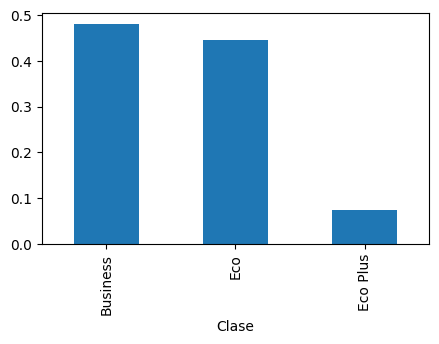

In [13]:
plt.figure(figsize=(5, 3))
data['Gender'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.xlabel("Genero")
plt.show()

plt.figure(figsize=(5, 3))
data['Customer Type'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.xlabel("Tipo")
plt.show()

plt.figure(figsize=(5, 3))
data['Type of Travel'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.xlabel("Tipo")
plt.show()

plt.figure(figsize=(5, 3))
data['Class'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.xlabel("Clase")
plt.show()

In [14]:
# Imputación 
for col in columnas_categorias:
    if data[col].isnull().mean() > 0:
        data[f'{col}_missing'] = data[col].isnull().astype(int)
        moda = data[col].mode()[0]
        data[col].fillna(moda, inplace=True)

In [15]:
# Codificación One Hot Encoding
data_encoded = pd.get_dummies(data, columns=columnas_categorias, drop_first=True)
print(data_encoded.head().T)

                                           0          1  \
Unnamed: 0                                 0          1   
id                                     19556      90035   
Age                                       52         36   
Flight Distance                          160       2863   
Inflight wifi service                      5          1   
Departure/Arrival time convenient          4          1   
Ease of Online booking                     3          3   
Gate location                              4          1   
Food and drink                             3          5   
Online boarding                            4          4   
Seat comfort                               3          5   
Inflight entertainment                     5          4   
On-board service                           5          4   
Leg room service                           5          4   
Baggage handling                           5          4   
Checkin service                            2          3 

### Variables continuas y discretas

In [16]:
columnas_numericas = data.select_dtypes(include=['number']).columns.tolist()

In [17]:
var_continuas = []
var_discretas = []

for col in columnas_numericas:
    if len(data[col].unique()) < 20:
        var_discretas.append(col)
    else:
        var_continuas.append(col)

In [18]:
print("Variables continuas: ")
print(var_continuas)
print()

print("Variables discretas: ")
print(var_discretas)

Variables continuas: 
['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Arrival Delay in Minutes Media', 'Arrival Delay in Minutes Mediana']

Variables discretas: 
['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


### Tratamiento de outliers

In [19]:
# Capping dinal de cola
per_inferior = 0.05
per_superior = 0.95

for col in var_continuas:
    lim_inferior = data_encoded[col].quantile(per_inferior)
    lim_superior = data_encoded[col].quantile(per_superior)
    data_encoded[col] = data_encoded[col].clip(lower=lim_inferior, upper=lim_superior)

data_encoded[var_continuas].head()

,Unnamed: 0,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Arrival Delay in Minutes Media,Arrival Delay in Minutes Mediana
0,1298.75,19556.0,52,177,50,44.0,44.0,44.0
1,1298.75,90035.0,36,2863,0,0.0,0.0,0.0
2,1298.75,12360.0,20,192,0,0.0,0.0,0.0
3,1298.75,77959.0,44,3363,0,6.0,6.0,6.0
4,1298.75,36875.0,49,1182,0,20.0,20.0,20.0


In [20]:
# Metricas de transformaciones
def calcular_metricas(df, col):
    metricas = {}
    metricas['media'] = df[col].mean()
    metricas['mediana'] = df[col].median()
    metricas['varianza'] = df[col].var()
    metricas['IQR'] = df[col].quantile(0.75) - df[col].quantile(0.25)
    metricas['asimetría'] = df[col].skew()
    metricas['curtosis'] = df[col].kurtosis()
    stat, p = stats.shapiro(df[col].dropna())
    metricas['shapiro_p'] = p  # p-valor de Shapiro-Wilk test
    return metricas

In [21]:
# Comparar transformaciones
metricas_transformaciones = {}

for col in var_continuas:
    metricas_transformaciones[col] = {}
    
    # Original
    metricas_transformaciones[col]['original'] = calcular_metricas(data_encoded, col)
    
    # Logaritmica
    data_log = np.log1p(data_encoded[col])
    metricas_transformaciones[col]['logaritmica'] = calcular_metricas(pd.DataFrame(data_log, columns=[col]), col)
    
    # Polinomial
    data_poly = np.power(data_encoded[col], 2)
    metricas_transformaciones[col]['polinomial'] = calcular_metricas(pd.DataFrame(data_poly, columns=[col]), col)
    
    # Box-Cox
    if (data_encoded[col] > 0).all() and (data_encoded[col].nunique() > 1):
        data_boxcox, _ = stats.boxcox(data_encoded[col])
        metricas_transformaciones[col]['boxcox'] = calcular_metricas(pd.DataFrame(data_boxcox, columns=[col]), col)


/Users/chrismerida/anaconda3/envs/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25976.
  res = hypotest_fun_out(*samples, **kwds)
/Users/chrismerida/anaconda3/envs/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25976.
  res = hypotest_fun_out(*samples, **kwds)
/Users/chrismerida/anaconda3/envs/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25976.
  res = hypotest_fun_out(*samples, **kwds)
/Users/chrismerida/anaconda3/envs/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25976.
  res = hypotest_fun_out(*s

In [25]:
for col, metricas in metricas_transformaciones.items():
    print(f"Columna: {col}")
    for trans, vals in metricas.items():
        print()
        print(f"  Transformación: {trans}")
        for metrica, valor in vals.items():
            print(f"    {metrica}: {valor}")
    print()

Columna: Unnamed: 0

  Transformación: original
    media: 12987.5
    mediana: 12987.5
    varianza: 54656010.543748796
    IQR: 12987.5
    asimetría: 4.764211080502944e-17
    curtosis: -1.2500385034249029
    shapiro_p: 6.68472647385721e-70

  Transformación: logaritmica
    media: 9.213728355322013
    mediana: 9.471819628815009
    varianza: 0.6953687267105308
    IQR: 1.0985096383654245
    asimetría: -1.0499729010071102
    curtosis: 0.16127023470023705
    shapiro_p: 2.958969854866874e-88

  Transformación: polinomial
    media: 223329062.6972542
    mediana: 168675156.5
    varianza: 3.9116731582325656e+16
    IQR: 337350312.5
    asimetría: 0.5929548517796803
    curtosis: -0.9759443024075347
    shapiro_p: 9.312510233672594e-85

  Transformación: boxcox
    media: 1060.7040067837747
    mediana: 1106.658443260119
    varianza: 219982.67808247983
    IQR: 792.7728577269252
    asimetría: -0.2515863515044083
    curtosis: -1.1230663294093612
    shapiro_p: 8.750466708078903e-

In [26]:
# Aplicando transformación logarítmica
for col in var_continuas:
    data_encoded[col] = np.log1p(data_encoded[col])

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded[var_continuas] = scaler.fit_transform(data_encoded[var_continuas])

# Verificación de la estandarización
print(data_encoded[var_continuas].describe().T)

                                    count          mean       std       min  \
Unnamed: 0                        25976.0 -1.400515e-15  1.000019 -2.450978   
id                                25976.0  2.976642e-15  1.000019 -2.477171   
Age                               25976.0  4.650149e-17  1.000019 -2.166938   
Flight Distance                   25976.0  3.589505e-16  1.000019 -1.769073   
Departure Delay in Minutes        25976.0  5.197225e-17  1.000019 -0.773881   
Arrival Delay in Minutes          25893.0  2.675546e-18  1.000019 -0.785357   
Arrival Delay in Minutes Media    25976.0 -1.948959e-17  1.000019 -0.788543   
Arrival Delay in Minutes Mediana  25976.0 -1.948959e-17  1.000019 -0.788543   

                                       25%       50%       75%       max  
Unnamed: 0                       -0.521638  0.309510  0.795723  1.079193  
id                               -0.518243  0.317121  0.790603  1.066423  
Age                              -0.755684  0.206059  0.805426 

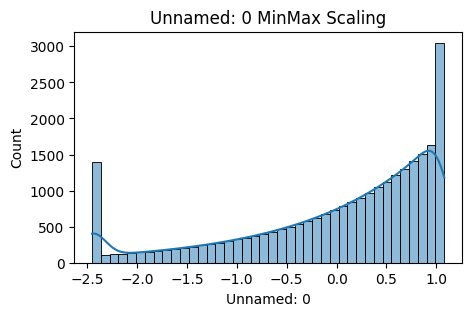

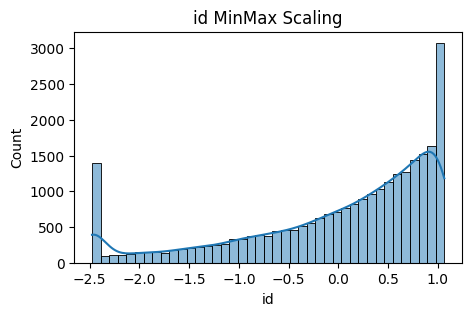

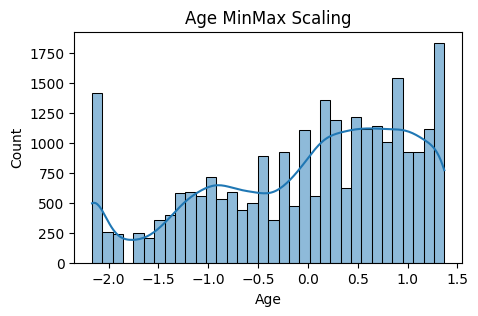

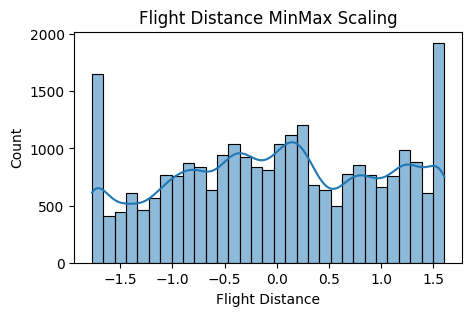

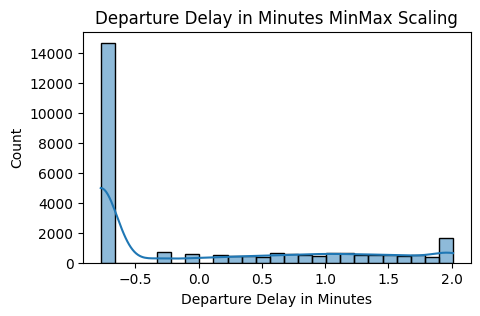

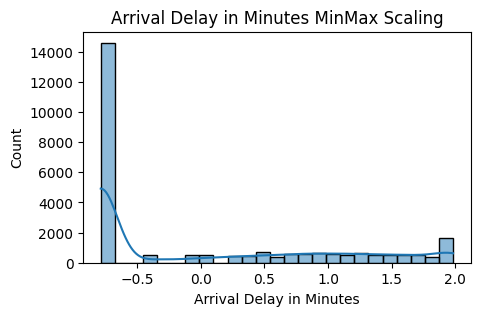

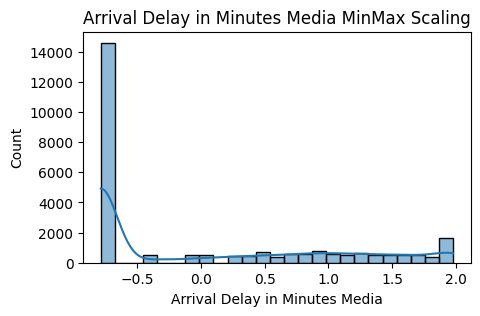

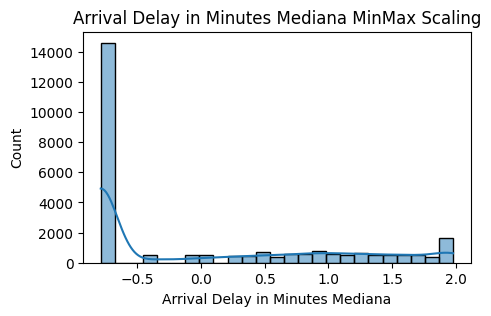

In [28]:
# Distribuciones de las columnas escaladas
for col in var_continuas:
    plt.figure(figsize=(5, 3))
    sns.histplot(data_encoded[col], kde=True)
    plt.title(f'{col} MinMax Scaling')
    plt.show()